# Cluster Analysis - May

## Data Preprocessing

For the purpose of working on the scale of one pc, only one BMS file is examined. Within this file, only one devices of multiple modules is also examined.

In [30]:
import pandas as pd
import glob
import timeit

bms_files = glob.glob('../../Bowland North Model/bms/bms-may-2017.csv')
bms_meta_df = pd.read_csv('../../Bowland North Model/metadata/planonmeters.csv')

bms_frame_list = []

# timing the loop
start_time = timeit.default_timer()
for file_ in bms_files:
    df = pd.read_csv(file_, header=0)
    df = df[df['device_id'] == '{A69642A1-3855-479C-89F7-DCB47B48FCC0}'] 
    bms_frame_list.append(df)
elapsed = timeit.default_timer() - start_time

bms_df = pd.concat(bms_frame_list)

print("%d rows" % bms_df.shape[0])
print("%.2f seconds" % elapsed)
bms_df.head()

587198 rows
66.70 seconds


,param_name,param_type,param_value,timestamp,device_id,module_key
2992,S,1,45.72921,2017-05-01 01:00:00.127000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D11
2993,S,1,43.185589,2017-05-01 01:00:00.140000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D15
2994,S,101,1,2017-05-01 01:00:00.150000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D19
2995,S,1,100.0,2017-05-01 01:00:00.160000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D4
2996,S,1,71.754837,2017-05-01 01:00:00.167000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D8


## EDA
### Module Key Dimensions

In [31]:
print("%d unique modules/sensors" % len(bms_df['module_key'].unique()))
bms_df = bms_df[bms_df['param_value'] != "Invalid"]
mod_keys = bms_df['module_key'].unique()
bms_df['timestamp'] = pd.to_datetime(bms_df['timestamp'])

138 unique modules/sensors


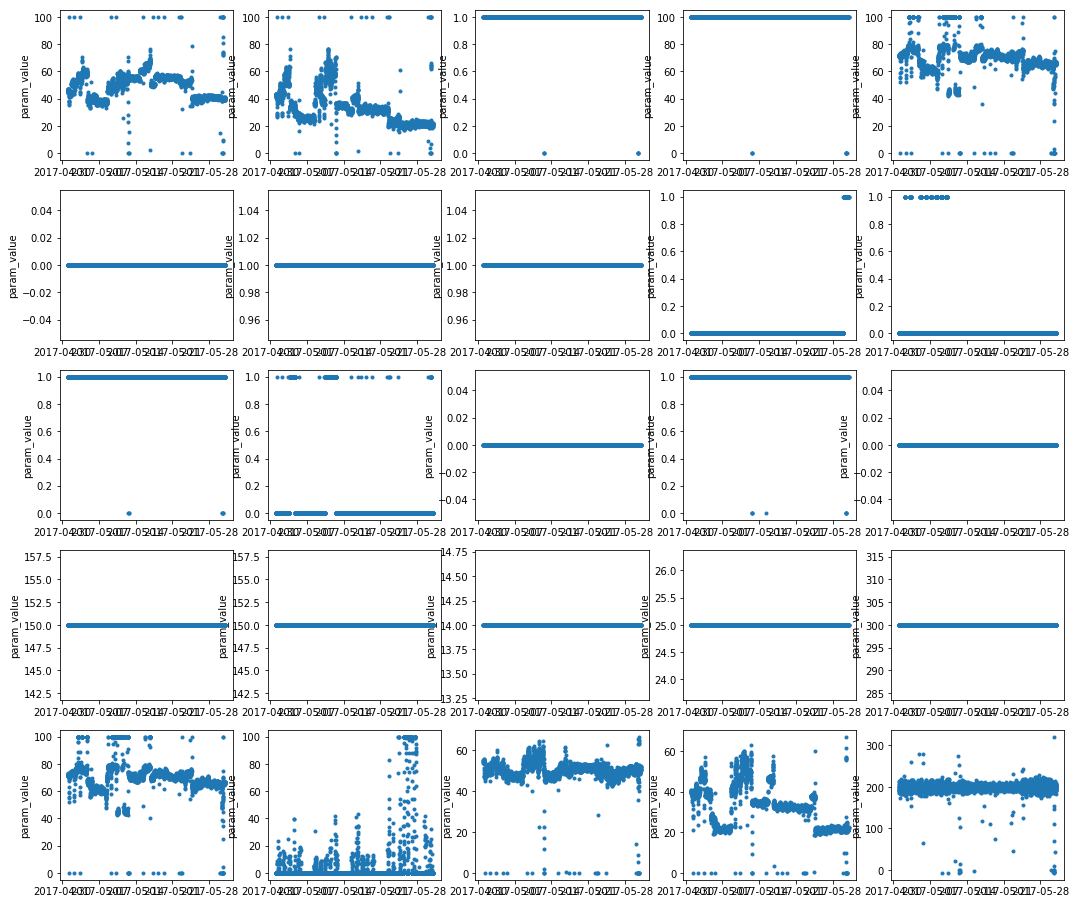

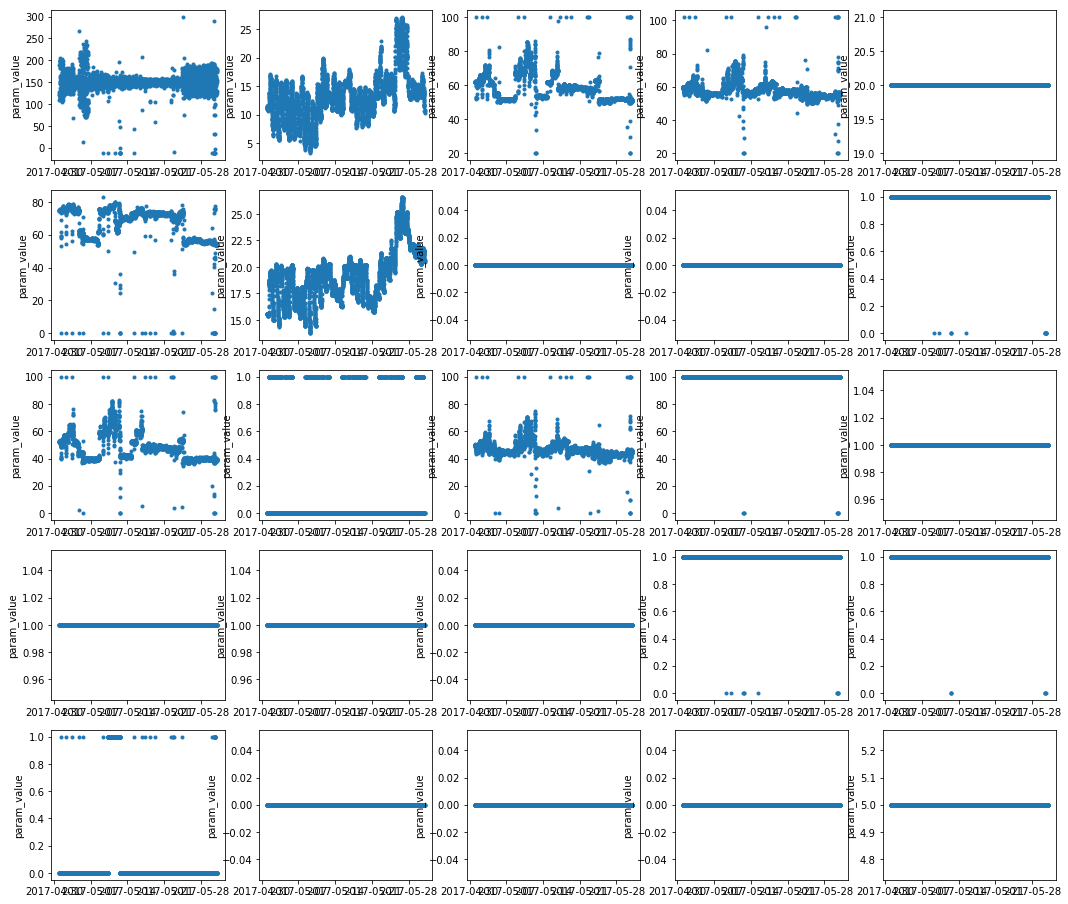

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 

i = 1
plt.rcParams["figure.figsize"] = [18, 16]
plt.figure(1) 
for mkey in mod_keys[:25]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.ylabel("param_value")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1
# plt.savefig('plots/module_samples_raw.png')
i = 1
plt.figure(2) 
for mkey in mod_keys[25:50]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.ylabel("param_value")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

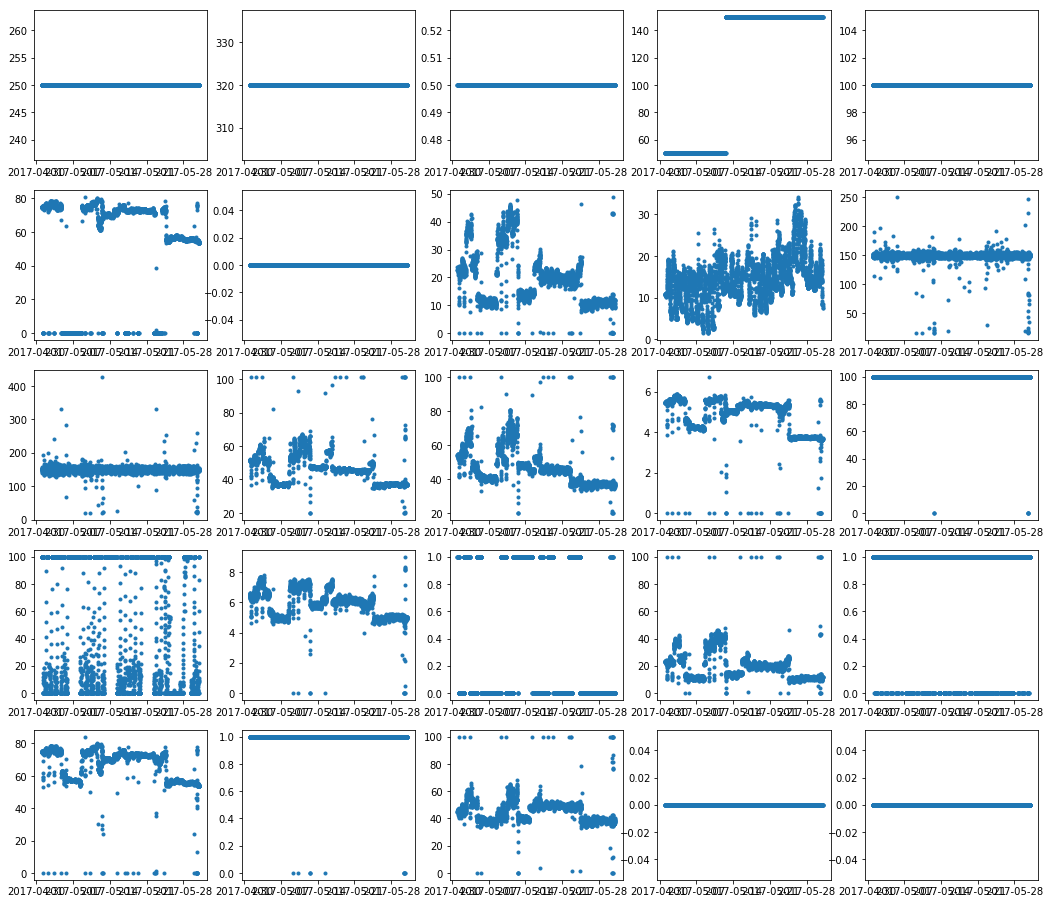

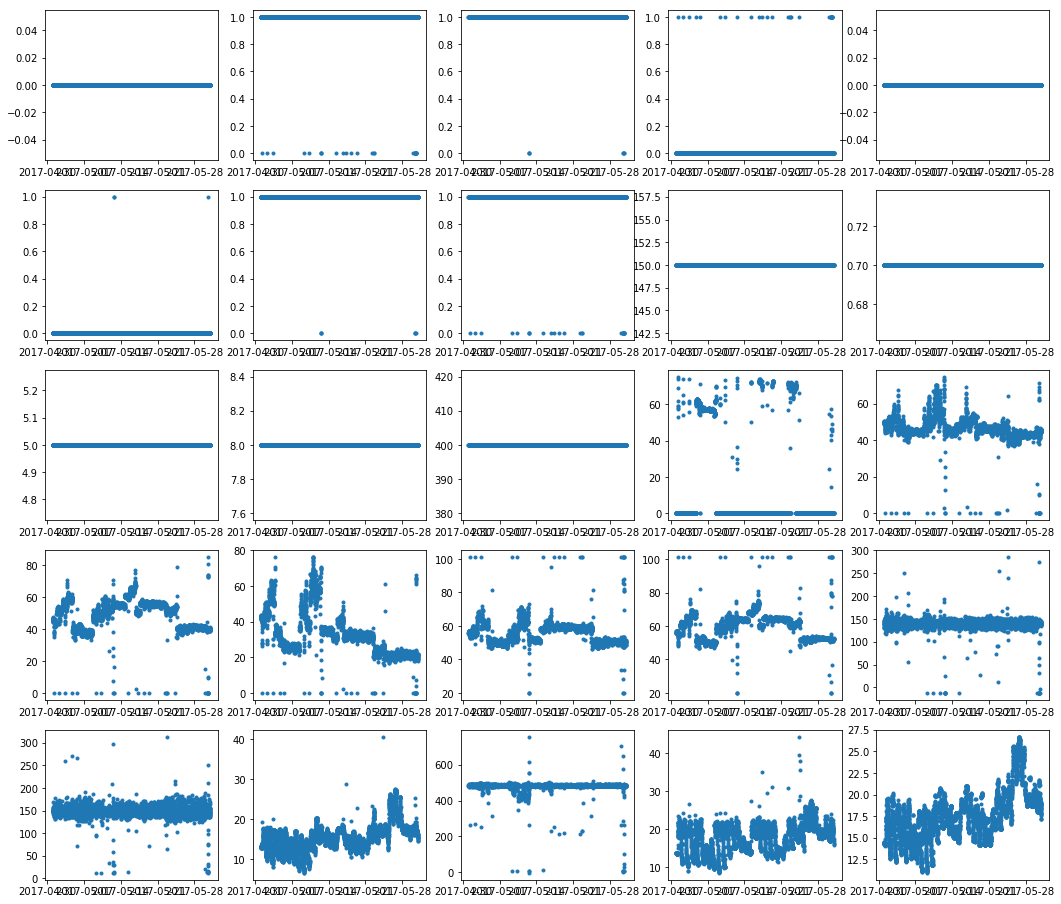

In [33]:
i = 1
plt.figure(1) 
for mkey in mod_keys[50:75]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

i = 1
plt.figure(2) 
for mkey in mod_keys[75:100]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

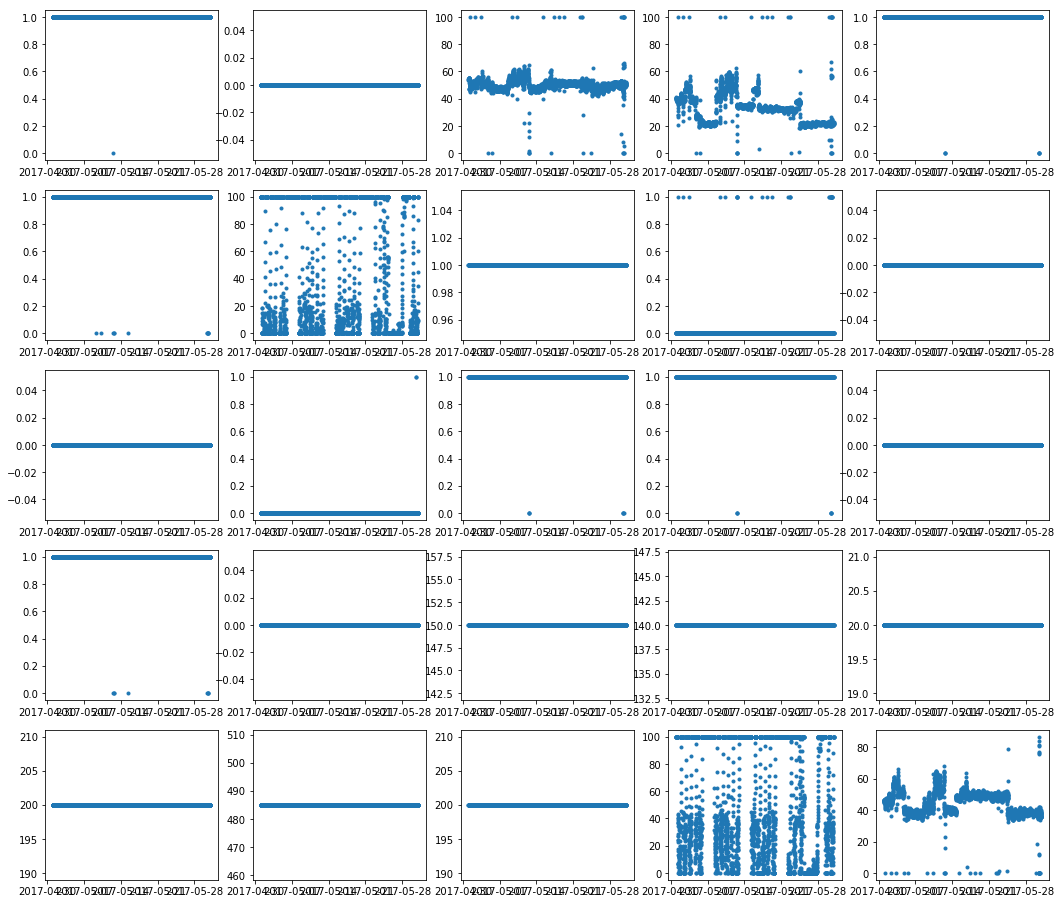

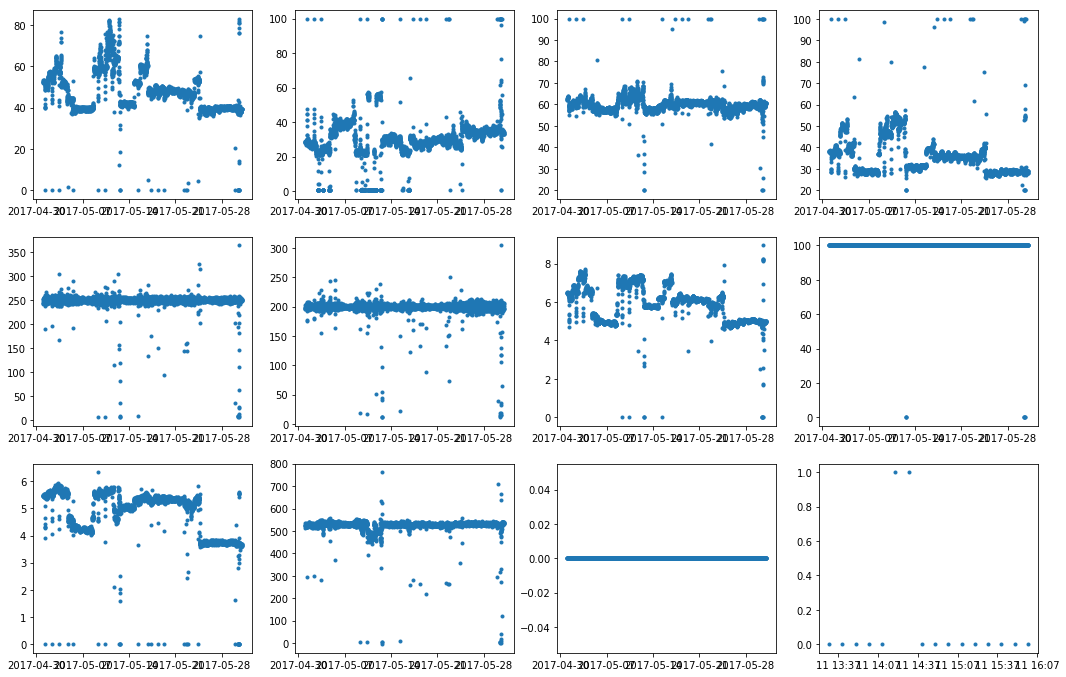

In [34]:
i = 1
plt.figure(1) 
for mkey in mod_keys[100:125]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    sensor = sensor[sensor['param_value'] != 'Invalid']
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

i = 1
plt.figure(2) 
for mkey in mod_keys[125:]:
    plt.subplot(4, 4, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

##### Comparing timescales of sensor readings

In [35]:
bms_df.sort_values('timestamp', inplace=True)
bms_df.groupby('module_key').head(2)

,param_name,param_type,param_value,timestamp,device_id,module_key
3084,S,101,1,2017-05-01 01:00:00.120,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1
7057,S,1,53.527798,2017-05-01 01:00:00.123,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D10
2992,S,1,45.72921,2017-05-01 01:00:00.127,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D11
6137,S,1,23.645384,2017-05-01 01:00:00.130,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D12
3085,S,1,52.292053,2017-05-01 01:00:00.130,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D13
7058,S,1,39.620216,2017-05-01 01:00:00.137,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D14
2993,S,1,43.185589,2017-05-01 01:00:00.140,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D15
6138,S,101,1,2017-05-01 01:00:00.140,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D16
3086,S,101,0,2017-05-01 01:00:00.143,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D17
7059,S,101,1,2017-05-01 01:00:00.143,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D18


In [36]:
bms_df.groupby('module_key').tail(2)

,param_name,param_type,param_value,timestamp,device_id,module_key
15800043,D,101,0,2017-05-11 15:50:04.560,{A69642A1-3855-479C-89F7-DCB47B48FCC0},W7
15838637,D,101,0,2017-05-11 16:00:02.300,{A69642A1-3855-479C-89F7-DCB47B48FCC0},W7
44895350,S,101,1,2017-05-31 00:50:02.243,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1
44895148,S,1,40.52726,2017-05-31 00:50:02.247,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D11
44894970,S,1,50.274727,2017-05-31 00:50:02.247,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D10
44895352,S,1,39.322086,2017-05-31 00:50:02.250,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D13
44895533,S,1,11.97999,2017-05-31 00:50:02.250,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D12
44894972,S,1,22.328758,2017-05-31 00:50:02.253,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D14
44895150,S,1,21.822035,2017-05-31 00:50:02.257,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D15
44895535,S,101,1,2017-05-31 00:50:02.260,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D16


### Descriptive Statistics

In [37]:
from scipy import stats
import numpy as np

st_df = bms_df[['module_key', 'param_value']]
st_df['param_value'] = pd.to_numeric(st_df['param_value'])
st_df.groupby('module_key')['param_value'].describe().transpose()

# it's really wide so probably good to examine in a spreadsheet:
# st_df.groupby('module_key')['param_value'].describe().transpose().to_csv("summary_stats.csv")
st_df.groupby('module_key')['param_value'].describe().transpose()

E:\Anaconda3\envs\dsci\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


module_key,D1,D10,D11,D12,D13,D14,D15,D16,D17,D18,...,S7,S8,S9,W1,W2,W3,W4,W5,W6,W7
count,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,...,4286.000000,4286.000000,4286.000000,4286.0,4286.000000,4286.000000,4286.0,4286.0,4286.0,16.000000
mean,0.996500,50.376631,49.486656,20.026545,48.201942,33.074029,33.295149,0.728651,0.336911,0.998367,...,17.593573,5.912632,524.416472,0.0,0.999767,0.344610,0.0,0.0,0.0,0.125000
std,0.059062,5.497799,9.174360,10.772484,9.837815,10.901718,12.489136,0.444707,0.472709,0.040385,...,2.911076,0.895189,36.897141,0.0,0.015275,0.475297,0.0,0.0,0.0,0.341565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.922472,0.000000,-4.624992,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,1.000000,48.271735,41.167965,11.599913,40.065504,22.158286,23.770102,0.000000,0.000000,1.000000,...,15.619912,5.041088,526.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000
50%,1.000000,50.299313,51.301029,19.010323,47.118322,32.717581,31.533919,1.000000,0.000000,1.000000,...,17.650532,6.010030,529.875000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000
75%,1.000000,51.984203,55.468397,23.613229,53.169709,39.159328,38.137301,1.000000,1.000000,1.000000,...,19.071096,6.516081,533.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.000000
max,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,...,26.696815,9.010729,761.500000,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000000


Removing the readings with no variation, as well as binary meters.
Sort the remaining by their means and observe patterns.

In [38]:
stats_df = st_df.groupby('module_key')['param_value'].describe()
stats_df = stats_df[stats_df['std'] != 0] # std == 0 gone
stats_df = stats_df[(stats_df['min'] != 0) & (stats_df['max'] != 1)]
stats_df = stats_df[stats_df['min'] != stats_df['max']]
print("%d sensors with variation remain" % stats_df.shape[0])
stats_df.sort_values('mean', inplace=True)

26 sensors with variation remain


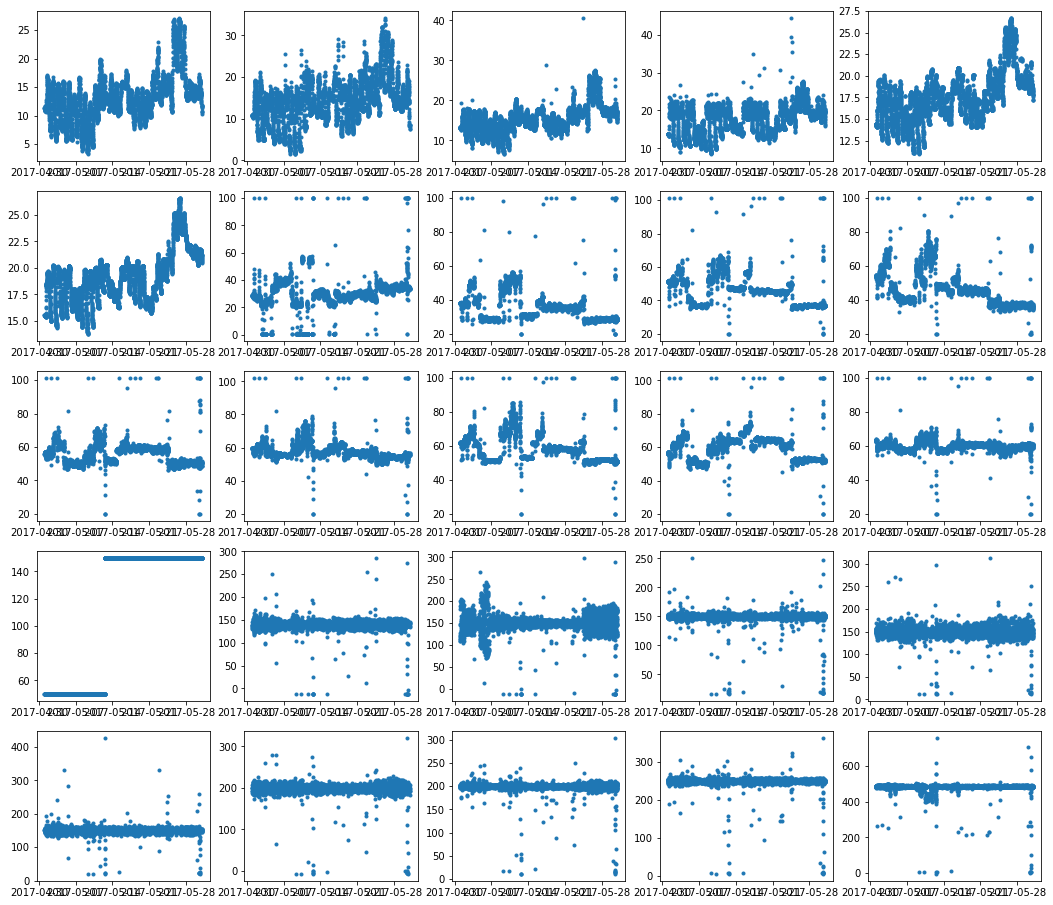

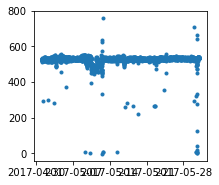

In [39]:
mod_keys = stats_df.index.values

i = 1
plt.figure(1) 
for mkey in mod_keys[:25]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    sensor = sensor[sensor['param_value'] != 'Invalid']
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

i = 1
plt.figure(2) 
for mkey in mod_keys[25:]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

In [40]:
stats_df

,count,mean,std,min,25%,50%,75%,max
module_key,,,,,,,,
S2,4286.0,13.192429,4.093251,3.226223,10.826605,13.223259,15.262594,27.141289
S1,4286.0,14.278165,5.351891,1.478219,11.096773,14.373655,17.230031,34.237267
S3,4286.0,15.416688,3.410285,6.540739,13.397562,15.349745,17.127628,40.621826
S4,4286.0,17.574489,3.665333,8.479782,14.730973,18.278023,19.951324,44.396854
S7,4286.0,17.593573,2.911076,10.922472,15.619912,17.650532,19.071096,26.696815
S6,4286.0,19.137632,2.405235,13.754879,17.301929,19.158249,20.404509,26.609665
S11,4286.0,29.717781,11.992850,0.310000,26.072501,29.890001,34.779999,100.109993
S19,4286.0,35.904907,8.590248,19.930000,29.189999,35.090000,38.710003,100.200012
S21,4286.0,46.104736,8.675080,19.869999,37.330002,45.630001,51.059998,101.390007


### Naive K-Means

Naive k-means clustering based on summary stats of the sensors of varying readings to provide some initial insight. First the elbow method is employed to observe the clusters that explain the most variance in the data set.
(Naive because it doesn't yet account for weekly perodicity, or other factors that might be of significance, that are not yet accounted for)

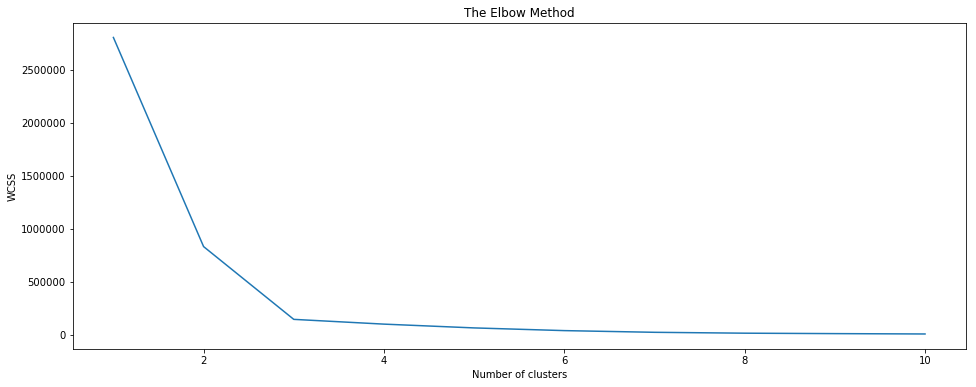

In [41]:
X = stats_df.iloc[:,:].values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_SEED_KMEANS = 42

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = RANDOM_SEED_KMEANS)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = [16, 6]
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

__Three__ clusters account for the most variance.

In [42]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
predicted_cluster_series = kmeans.fit_predict(X)
stats_df['cluster'] = predicted_cluster_series
stats_df.sort_index()['cluster']

module_key
K4     0
S1     0
S11    0
S12    2
S13    0
S14    2
S15    0
S16    2
S17    0
S18    2
S19    0
S2     0
S20    2
S21    0
S22    2
S23    0
S24    2
S25    0
S26    2
S27    0
S3     0
S36    1
S4     0
S6     0
S7     0
S9     1
Name: cluster, dtype: int32

#### Metadata Join
Arrange it by asset code (join with metadata file) to uniquely ID each sensor. A uniqe key is created by joining the _logger asset code_ and the _module key_. This makes it possible to refer to every sensor uniquely, since module keys alone are not unique.

In [43]:
#creating a key on which to join both DataFrames:

bms_meta_df = bms_meta_df[['Logger Channel', 'Logger Asset Code']]
bms_meta_df['key'] = bms_meta_df['Logger Asset Code'] + "/" + bms_meta_df['Logger Channel']
bms_meta_df.columns = ['device_id', 'asset_code', 'key']
bms_df['key'] = bms_df['device_id'] + "/" + bms_df['module_key']

bms_df = bms_df.merge(bms_meta_df, on='key')

bms_df.head()

,param_name,param_type,param_value,timestamp,device_id_x,module_key,key,device_id_y,asset_code
0,S,101,1,2017-05-01 01:00:00.120,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
1,S,101,1,2017-05-01 01:10:01.773,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
2,S,101,1,2017-05-01 01:20:02.463,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
3,S,101,1,2017-05-01 01:30:00.347,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
4,S,101,1,2017-05-01 01:40:00.723,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}


## K-means

As a start, examining similarity as a function of euclidean distance via K-means clustering on the original dataset.

In [44]:
import numpy as np

# use only sensors with varying readings
bms_df = bms_df[bms_df.module_key.isin(mod_keys)]
bms_df['timestamp'] = pd.to_datetime(bms_df['timestamp'])
bms_df['hour'] = bms_df['timestamp'].dt.hour
bms_df['day_of_week'] = bms_df['timestamp'].dt.weekday
bms_df['week_of_year'] = bms_df['timestamp'].dt.weekofyear
bms_df['minute'] = bms_df['timestamp'].dt.minute
bms_df['day'] = bms_df['timestamp'].dt.day
bms_df.sort_values('timestamp')
bms_cluster_df = bms_df[['hour', 'minute', 'day_of_week', 'week_of_year', 'param_value' ]]

# remove Invalid reading
bms_cluster_df = bms_cluster_df[bms_cluster_df['param_value'] != 'Invalid']


#Prepare data for clustering
X = bms_cluster_df.iloc[:,:].values

bms_cluster_df.head()

,hour,minute,day_of_week,week_of_year,param_value
325736,1,0,0,18,50.0
325737,1,10,0,18,50.0
325738,1,20,0,18,50.0
325739,1,30,0,18,50.0
325740,1,40,0,18,50.0


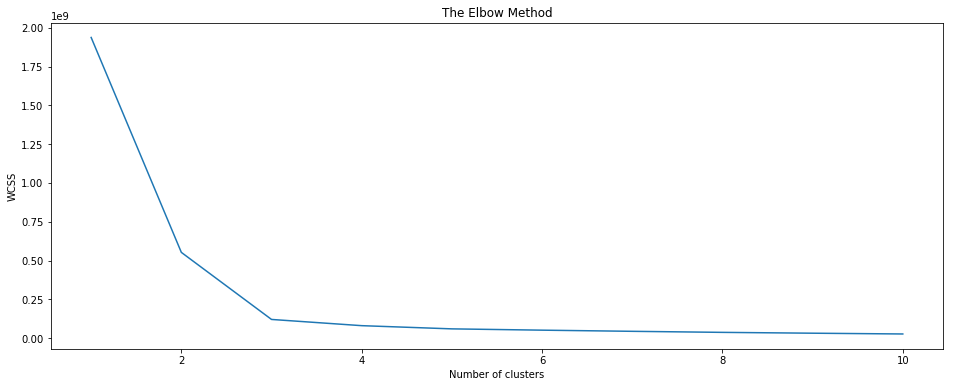

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_SEED_KMEANS = 42

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = RANDOM_SEED_KMEANS)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = [16, 6]
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The most variance is also explained by 3 clusters, using euclidean distance as a similarity metric alone.

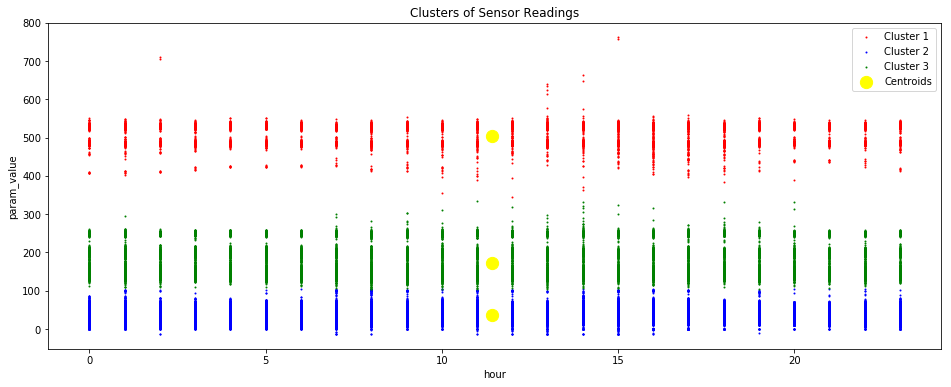

In [46]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 4], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 4], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 4], s = 1, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 4], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Sensor Readings')
plt.xlabel('hour')
plt.ylabel('param_value')
plt.rcParams["figure.figsize"] = [16, 6]
plt.legend()
plt.show()

## K-means on weekly aggregated summary statistic dataframe

Comparing the clusters that came out of the k-means clustering for the summary stats data, and the actual bms data, the clustering is about the same. That is, a cluster with mean from 3 - 65, one from 135 - 250, and one from 485+
(extra notes in backup)

making the summary stats across weeks in a month will help to account for some seasonality averages.

In [47]:
bms_df['month_week'] = bms_df['week_of_year'] % 4

In [48]:
st_df2 = bms_df[['module_key', 'param_value', 'month_week']]
st_df2['param_value'] = pd.to_numeric(st_df2['param_value'])
stats_df2 = st_df2.groupby(['module_key', 'month_week'])['param_value'].describe()
stats_df2 = stats_df2[stats_df2['count'].values > 0.0]
stats_df2 = stats_df2.reset_index()
month_stats = []

for i in range(4):
    week_df = stats_df2[stats_df2['month_week'] == i]
    month_stats.append(week_df)

month_stats = [df.set_index('module_key') for df in month_stats]
month_df = pd.concat(month_stats, axis=1)
month_df = month_df.dropna(axis=1, how='any')

month_df = month_df[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']] # to remove month_week category
month_df

E:\Anaconda3\envs\dsci\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,count,count,count,count,mean,mean,mean,mean,std,std,...,50%,50%,75%,75%,75%,75%,max,max,max,max
module_key,,,,,,,,,,,,,,,,,,,,,
K4,1001.0,1001.0,1285.0,999.0,150.000000,150.000000,72.801556,85.035035,0.000000,0.000000,...,50.000000,50.000000,150.000000,150.000000,50.000000,150.000000,150.000000,150.000000,150.000000,150.000000
S1,1001.0,1001.0,1285.0,999.0,13.897000,18.899984,12.374142,12.478140,4.144884,5.431443,...,13.397562,12.778790,16.770308,22.618145,15.524046,15.667848,29.250347,34.237267,25.450558,26.496370
S11,1001.0,1001.0,1285.0,999.0,27.426833,32.552438,32.318055,25.828288,6.743385,5.847669,...,33.869999,28.469997,29.690001,35.200001,38.310001,31.945001,100.109993,100.100006,100.109993,100.100006
S12,1001.0,1001.0,1285.0,999.0,199.457293,199.474899,197.789883,198.266767,9.662569,10.785187,...,199.875000,200.374985,203.000015,204.875000,205.000015,204.250015,215.999985,242.125000,320.999969,274.124969
S13,1001.0,1001.0,1285.0,999.0,59.732797,53.610000,54.652584,55.920351,3.210973,5.172504,...,51.459999,53.400005,60.110004,58.390003,58.689999,59.865002,101.230003,101.239990,101.360001,101.230003
S14,1001.0,1001.0,1285.0,999.0,149.509490,149.802072,148.597373,148.435435,6.407698,5.932647,...,149.874985,150.000000,151.375000,151.499985,151.499985,151.625000,178.250015,192.375000,251.124985,181.625015
S15,1001.0,1001.0,1285.0,999.0,60.715334,59.121528,59.769782,60.838509,2.978805,3.027078,...,59.790005,61.329998,61.329998,60.340000,60.919998,63.779999,100.000000,100.000000,100.020004,100.000000
S16,1001.0,1001.0,1285.0,999.0,149.408217,149.915086,147.814980,148.236236,8.608304,17.615502,...,148.875000,149.625000,152.125000,157.875000,162.375000,154.437493,208.624985,299.250000,289.874969,195.874985
S17,1001.0,1001.0,1285.0,999.0,65.714187,56.056453,56.297330,60.865896,4.286337,5.557228,...,52.770000,61.950005,67.239998,61.329998,61.830002,63.979996,101.430000,101.419998,101.520004,101.419998


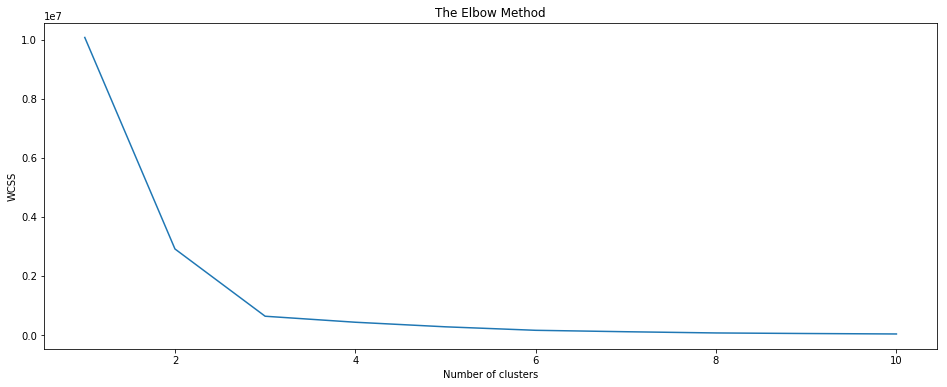

In [49]:
X = month_df.iloc[:,:].values

RANDOM_SEED_KMEANS = 42

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = RANDOM_SEED_KMEANS)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = [16, 6]
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
predicted_cluster_series = kmeans.fit_predict(X)
stats_df['cluster2'] = predicted_cluster_series
stats_df.sort_index()[['cluster','cluster2']].to_csv('kmeans/may_clust.csv')
stats_df.sort_index()[['cluster','cluster2']]

,cluster,cluster2
module_key,,
K4,0,2
S1,0,2
S11,0,2
S12,2,1
S13,0,2
S14,2,0
S15,0,0
S16,2,2
S17,0,2
